In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
baseball_Db = pd.read_csv(r"D:\Data Science\Baseball Data\baseball.csv")
baseball_Db

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
baseball_Db.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
baseball_Db.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
baseball_Db.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
baseball_Db.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
baseball_Db.shape

(30, 17)

In [9]:
baseball_Db.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

<Axes: >

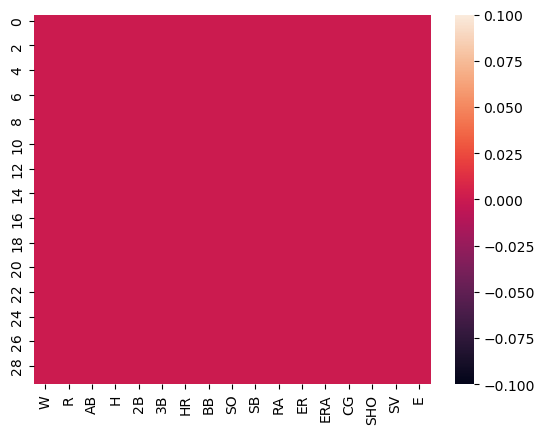

In [10]:
sns.heatmap(baseball_Db.isnull())

In [11]:
baseball_Db.value_counts()

W    R    AB    H     2B   3B  HR   BB   SO    SB   RA   ER   ERA   CG  SHO  SV  E  
63   626  5529  1374  272  37  130  387  1274  88   809  749  4.69  1   7    35  117    1
64   640  5571  1382  257  27  167  496  1255  134  754  700  4.33  2   8    35  90     1
98   697  5631  1462  292  27  140  461  1322  98   596  532  3.21  0   13   54  122    1
97   689  5491  1341  272  30  171  567  1518  95   608  546  3.36  6   21   48  111    1
95   724  5575  1497  300  42  139  383  973   104  641  601  3.73  2   8    56  88     1
93   891  5509  1480  308  17  232  570  1151  88   670  609  3.80  7   10   34  88     1
92   667  5385  1346  263  26  187  563  1258  59   595  553  3.44  6   21   47  75     1
90   683  5527  1351  295  17  177  488  1290  51   613  557  3.43  1   14   50  88     1
88   751  5511  1419  279  32  172  503  1233  101  733  680  4.24  5   9    45  119    1
87   764  5567  1397  272  19  212  554  1227  63   698  652  4.03  3   4    48  93     1
86   729  5459 

In [12]:
for i in baseball_Db.columns:
    print(baseball_Db[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [13]:
baseball_Db.nunique().to_frame("no of unique value")

,no of unique value
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [14]:
numerical_col =[] 
for i in baseball_Db.dtypes.index:
     if baseball_Db.dtypes[i]!="objects":
      numerical_col.append(i)
print("Nuemrical col", numerical_col)

Nuemrical col ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']


In [15]:
baseball_Db["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [16]:
baseball_Db["AB"].unique()

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [17]:
baseball_Db["H"].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [18]:
baseball_Db["2B"].unique()

array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

In [19]:
baseball_Db["3B"].unique()

array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

# Visulization of Dataset

<bound method IndexOpsMixin.value_counts of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64>




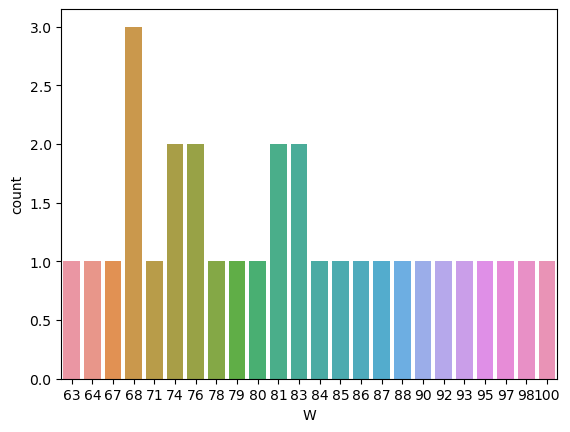

In [20]:
ax = sns.countplot(x='W', data =baseball_Db)
print(baseball_Db["W"].value_counts)
print("\n")

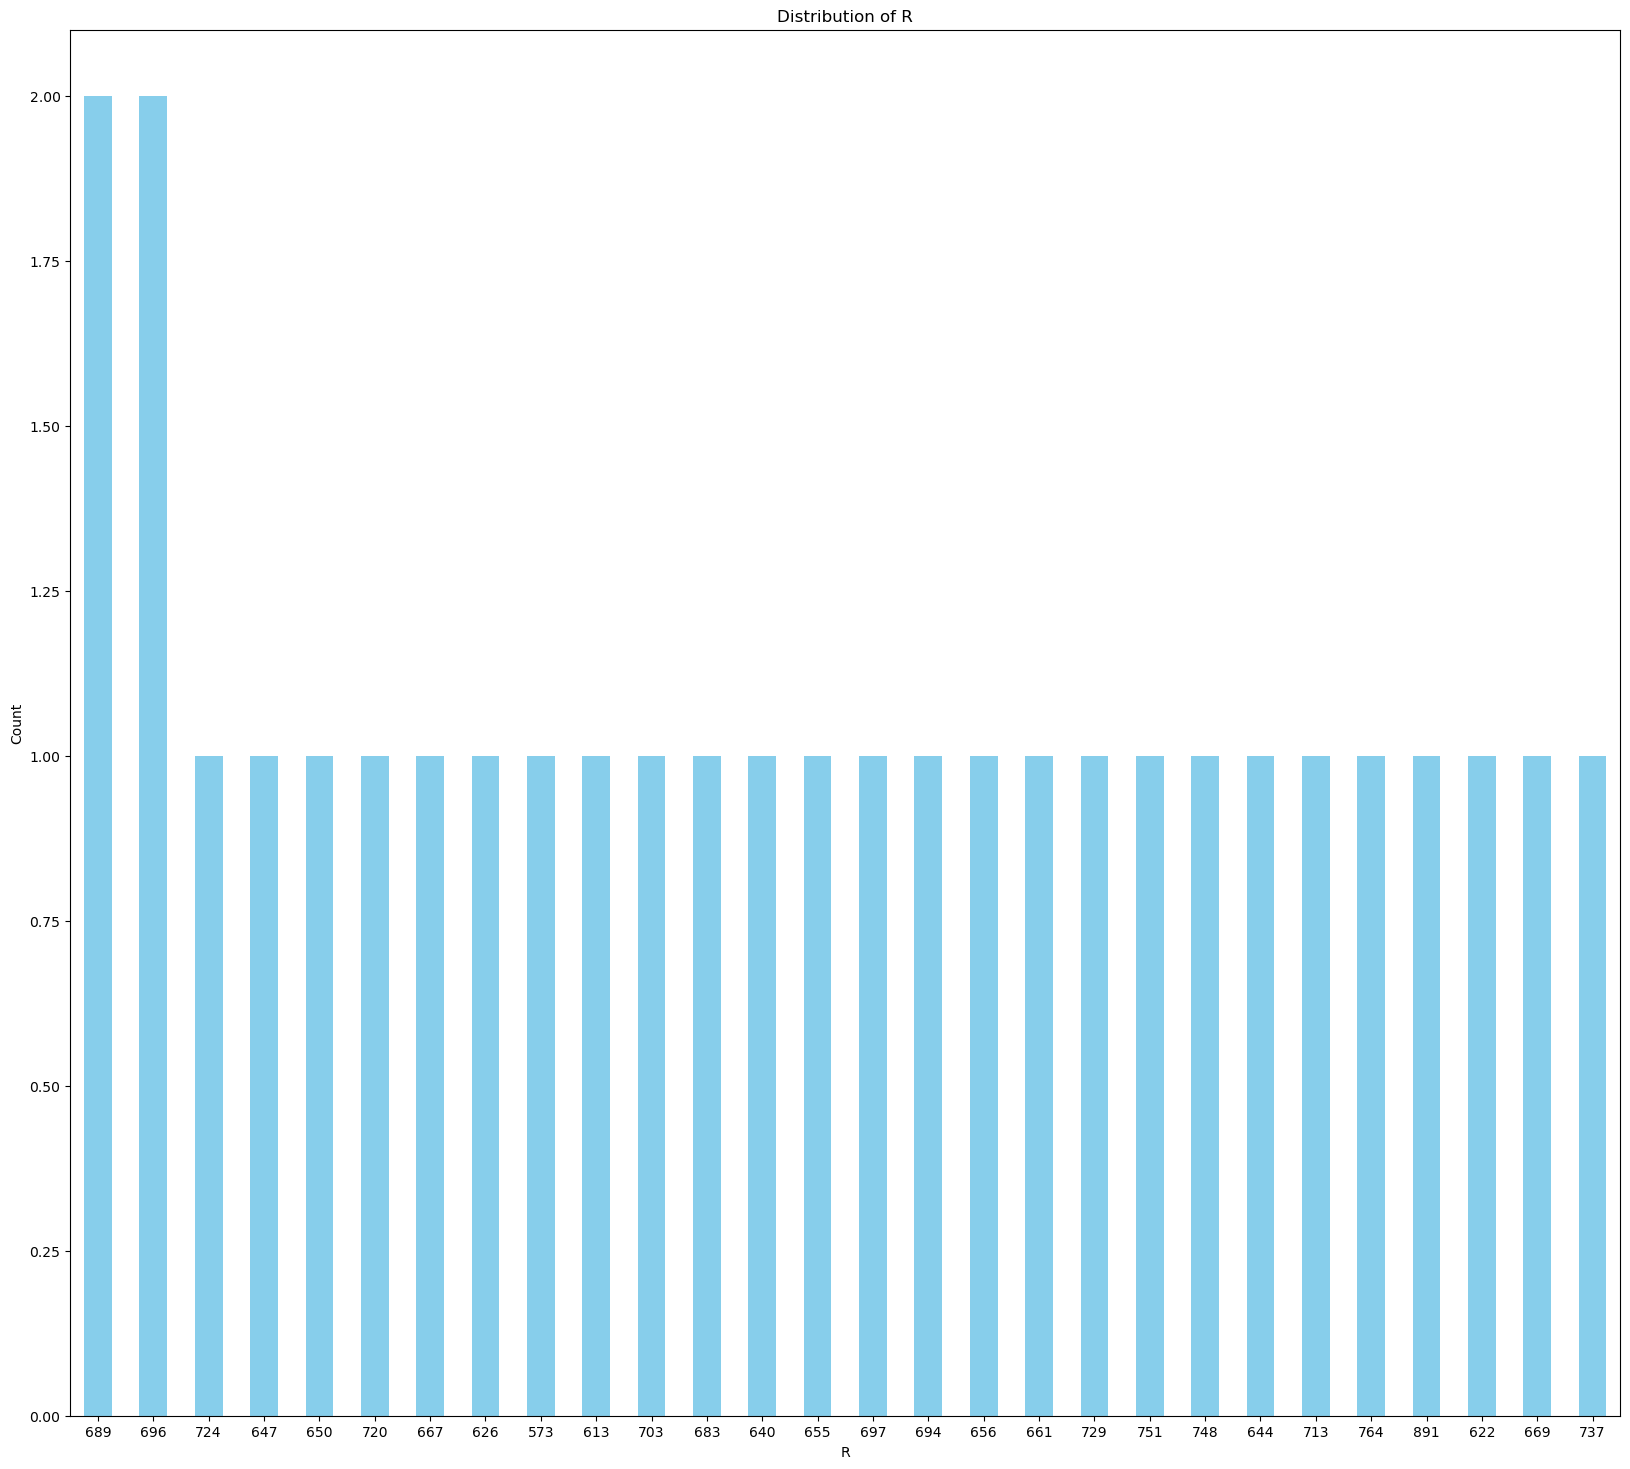

In [21]:
Runs_counts = baseball_Db["R"].value_counts()
plt.figure(figsize=(20,18))
Runs_counts.plot(kind='bar', color="skyblue")
plt.title("Distribution of R")
plt.xlabel("R")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

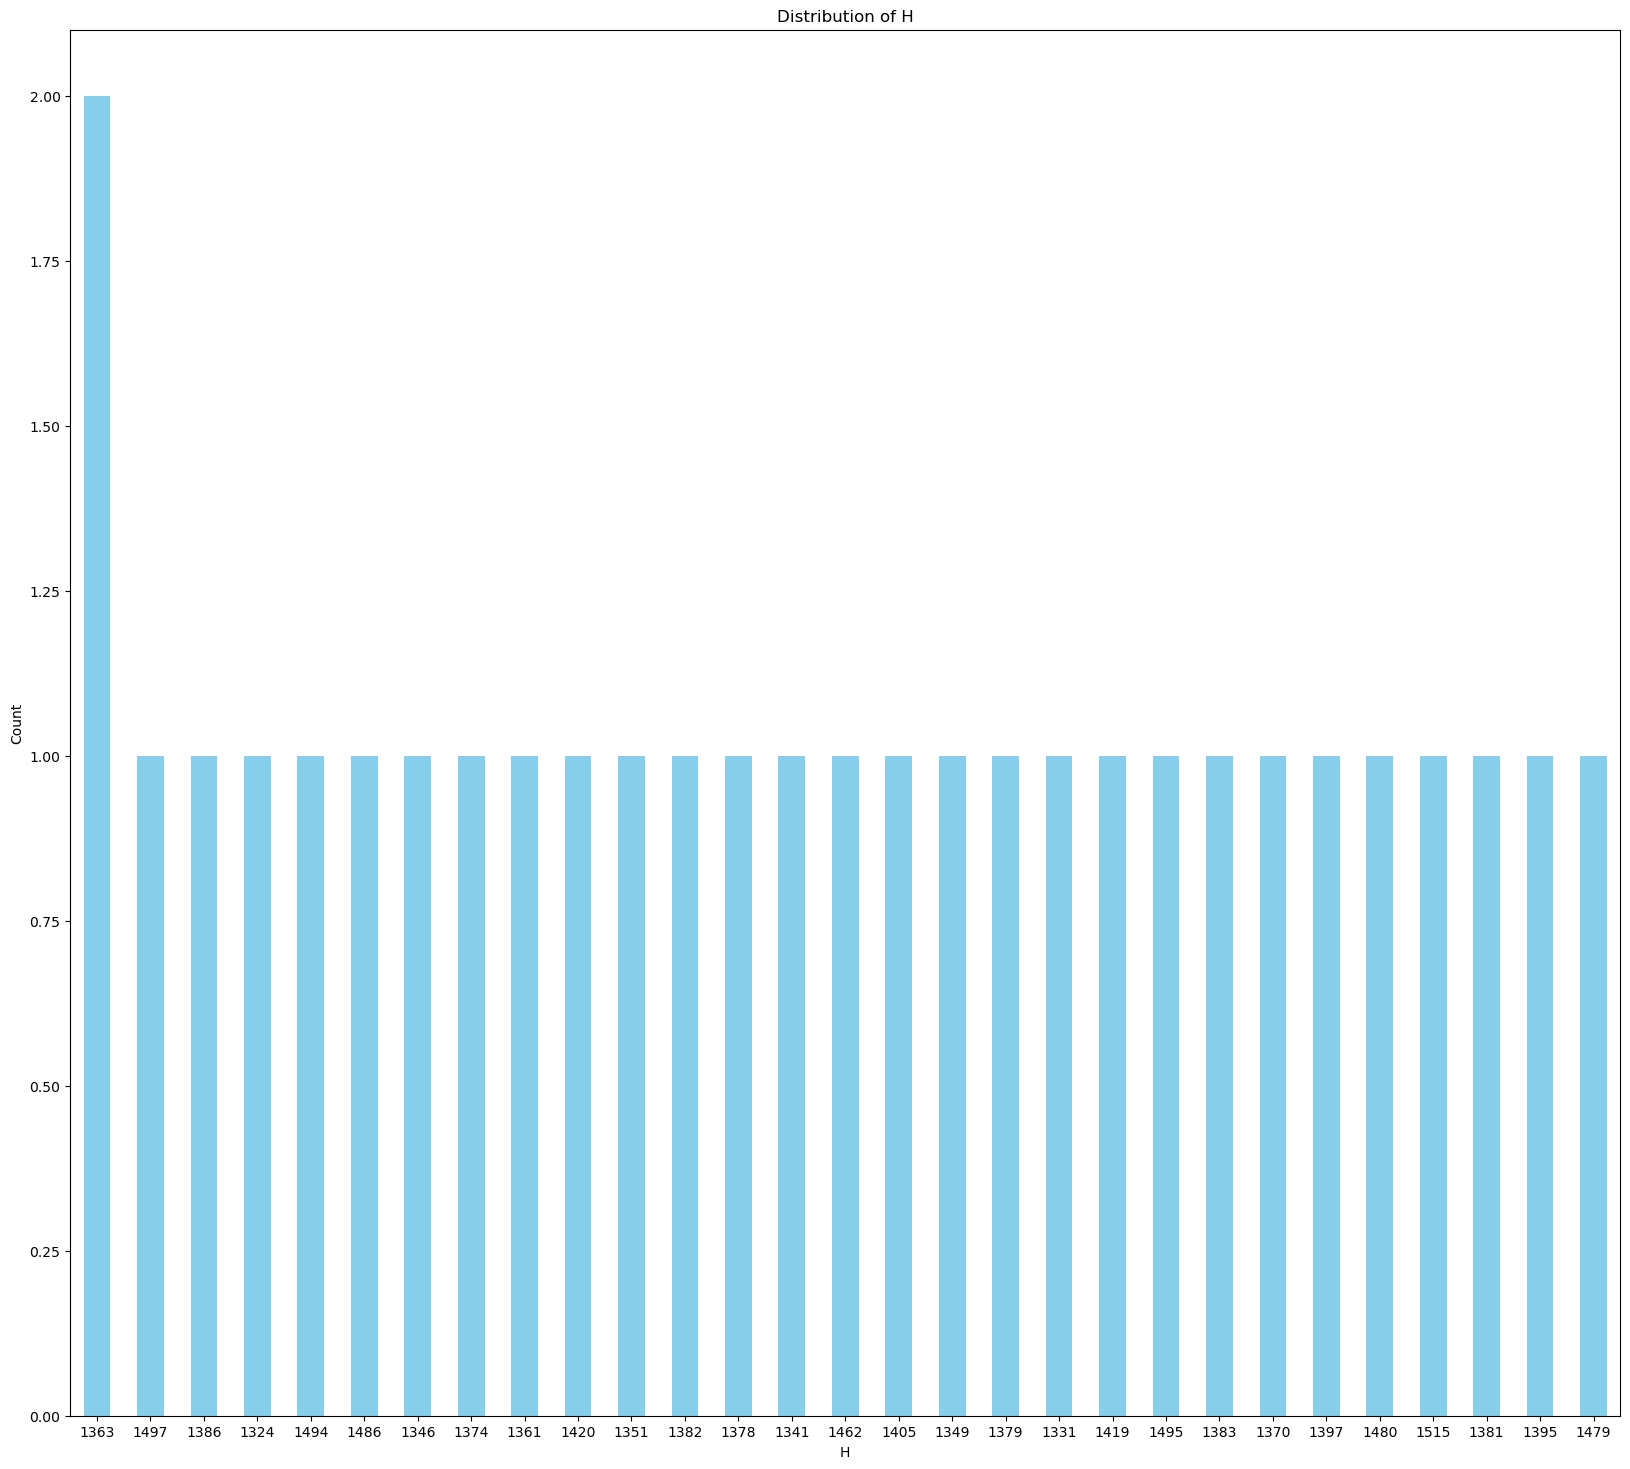

In [23]:
H_counts = baseball_Db["H"].value_counts()
plt.figure(figsize=(20,18))
H_counts.plot(kind='bar', color="skyblue")
plt.title("Distribution of H")
plt.xlabel("H")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

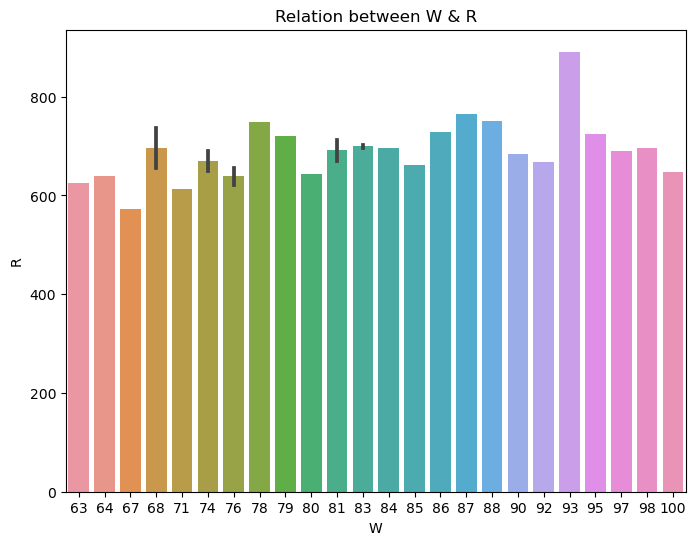

In [24]:
#H_counts = baseball_Db["H"].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x="W",y="R" , data = baseball_Db)
#H_counts.plot(kind='bar', color="skyblue")
plt.title("Relation between W & R")
plt.xlabel("W")
plt.ylabel("R")

plt.show()

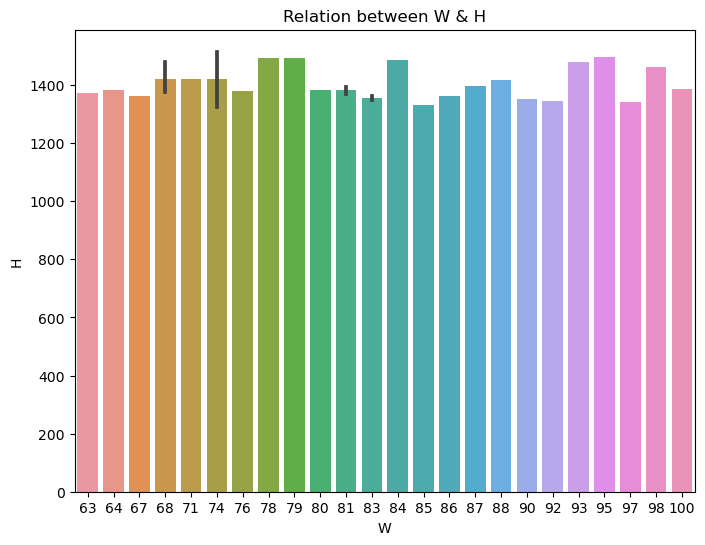

In [25]:
#H_counts = baseball_Db["H"].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x="W",y="H" , data = baseball_Db)
#H_counts.plot(kind='bar', color="skyblue")
plt.title("Relation between W & H")
plt.xlabel("W")
plt.ylabel("H")

plt.show()

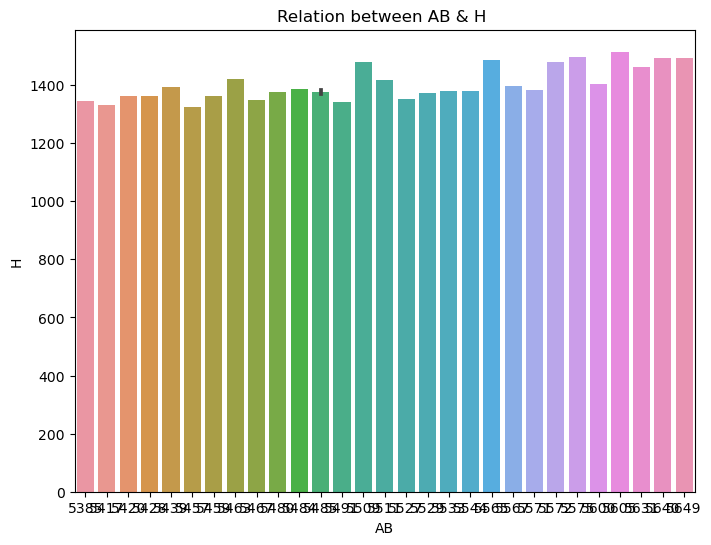

In [26]:
#H_counts = baseball_Db["H"].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x="AB",y="H" , data = baseball_Db)
#H_counts.plot(kind='bar', color="skyblue")
plt.title("Relation between AB & H ")
plt.xlabel("AB")
plt.ylabel("H")

plt.show()

# Now checking Outliers

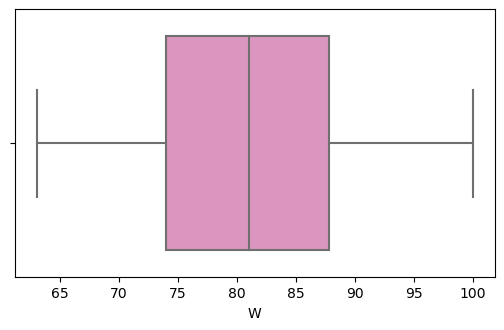

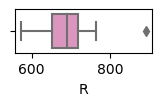

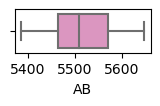

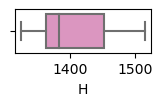

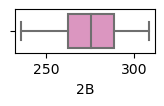

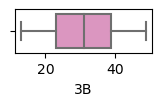

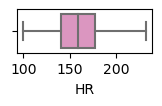

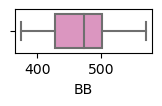

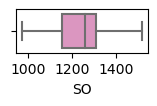

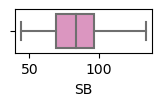

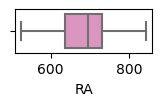

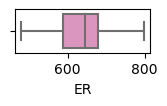

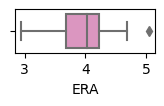

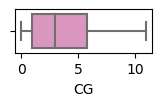

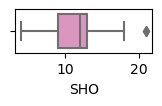

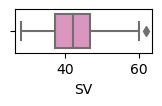

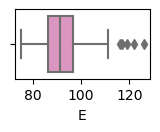

In [27]:
#num_numerical_cols = len(numerical_col)
num_rows = 5
num_cols = 4
total_subplots = num_rows*num_cols
plt.figure(figsize=(20,16),facecolor="white")

plotnumber =1

for col in numerical_col:
    if plotnumber <= total_subplots:
        ax = plt.subplot(num_rows, num_cols,plotnumber)
        sns.boxplot(x=baseball_Db[col], palette="Set2_r", ax=ax)
        
        plt.xlabel(col, fontsize=10)
        plt.ylabel("")
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber +=1
        
        plt.tight_layout()
        plt.show()



### Using IQR Methods to remove Outliers

In [28]:
Col_of_intrest = ['R','ERA','SHO','SV','E']
Q1 = baseball_Db[Col_of_intrest].quantile(0.25)
Q3 = baseball_Db[Col_of_intrest].quantile(0.75)

IQR  = Q3 - Q1
    
   #Determine base on IQR
lower_bound = Q1 - 1.5 * IQR
Uper_bound =  Q1 + 1.5 * IQR
    
    
  # identify outliers  
Outliers = baseball_Db[((baseball_Db[Col_of_intrest]<lower_bound) | (baseball_Db[Col_of_intrest] > Uper_bound)).any(axis=1)]  
             
  # Remove Outliers  
df1 = baseball_Db[~((baseball_Db[Col_of_intrest]<lower_bound) | (baseball_Db[Col_of_intrest] > Uper_bound)).any(axis=1)]              
    
    #print cleaned Dataframe
    
print("Data_Frame after outlier \n ") 
print(df1)     
print("remove Outliers \n ", Outliers)   
    
    
    
    

Data_Frame after outlier 
 
     W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
1   83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2   81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3   76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
7   81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
9   78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
11  86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12  85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13  76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
19  64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20  90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21  83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22  71  613  5463  1420  236  40  120  375  1150

### Checking for Skewness

In [29]:
baseball_Db.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

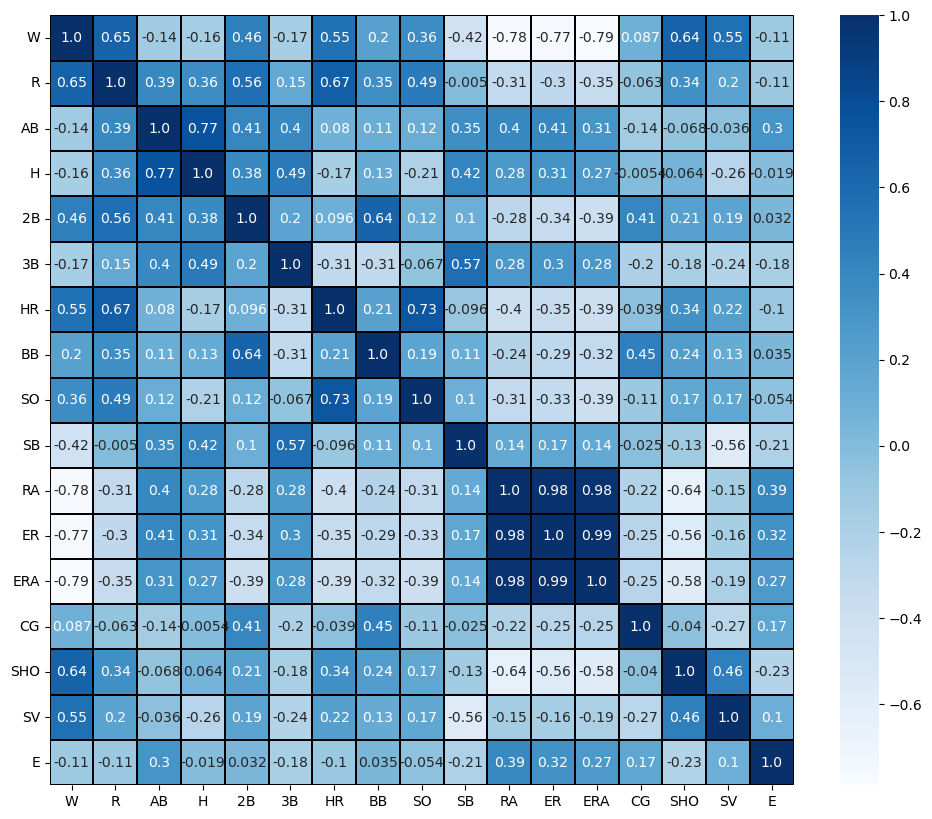

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),
            annot= True,
            cmap = 'Blues',
            linewidths=0.1,
            linecolor='black',
            fmt="0.2")

  # Rotate Y Axix lable to horizantal
plt.yticks(rotation=0)
  
  #Display the heat map

plt.show()




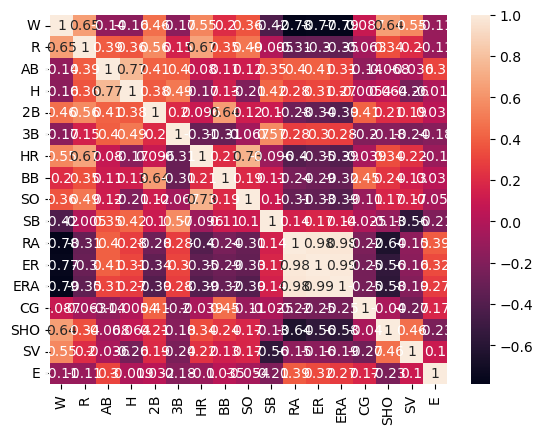

In [31]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [32]:
df1['R']= np.cbrt(df['R'])
df1['HR']= np.cbrt(df['HR'])
df1['R']= np.cbrt(df['SHO'])


NameError: name 'df' is not defined

In [ ]:
baseball_Db.corr()

In [33]:
baseball_Db.corr().W.Sort

AttributeError: 'Series' object has no attribute 'Sort'

In [37]:
x = df1.drop("W", axis=1)
y = df1["W"]

print("feature Diminsion", x.shape)
print("lable Diminsion", y.shape)

feature Diminsion (15, 16)
lable Diminsion (15,)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.matrics import mean_absolute_error
from sklearn.linear_model import LinearRegressior
from sklearn.matrics import mean_squared_error
from sklearn.matrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor


ModuleNotFoundError: No module named 'sklearn.matrics'

In [38]:
MaxAcc= 0
MaxRs = 0
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred = GBR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc> MaxAcc:
        MaxAcc = acc
        MaxRs =i
        
print("max r2 score is ", MaxAcc, "on Random state", MaxRs)
    
    
    
    
    

max r2 score is  0.8821910914869855 on Random state 3


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=MaxRs)

In [42]:
print("X test shape", x_test.shape)
print("X test shape", y_test.shape)
print("X test shape", x_train.shape)
print("X test shape", y_train.shape)

X test shape (5, 16)
X test shape (5,)
X test shape (10, 16)
X test shape (10,)
